# VO7 Stabilitätsanalyse

In [1]:
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

## Bedingt Stabil: Euler-Verfahren, Zerfallsgleichung

In [2]:
def decay(tau, u):
    return -u/tau

def get_u_expl_euler(tau, length, delta_t):
    steps = int(25/delta_t)
    u = [1]
    x = [0]
    for i in range(steps):
        u.append(u[i] + delta_t*decay(tau, u[i]))
        x.append((i+1)*delta_t)
    return u, x

def conditionally_stable(delta_t, tau):
    return abs(1-delta_t/tau)

g for delta_t (0.100000): 0.950000, g <= 1: True
g for delta_t (3.500000): 0.750000, g <= 1: True


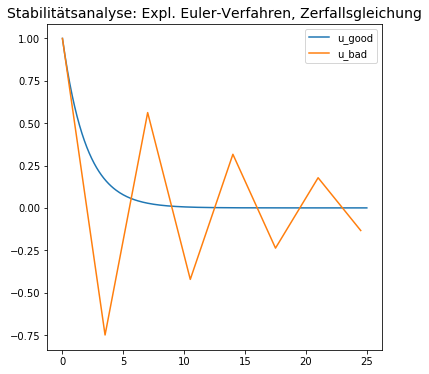

In [3]:
length = 25
tau = 2

delta_t = 0.1
u_good, x_good = get_u_expl_euler(tau, length, delta_t)
g = conditionally_stable(delta_t, tau)
print("g for delta_t (%f): %f, g <= 1: %r" % (delta_t, g, g<=1))

delta_t = 3.5
u_bad, x_bad = get_u_expl_euler(tau, length, delta_t)
g = conditionally_stable(delta_t, tau)
print("g for delta_t (%f): %f, g <= 1: %r" % (delta_t, g, g<=1))

plt.figure(figsize=(6,6))
plt.title("Stabilitätsanalyse: Expl. Euler-Verfahren, Zerfallsgleichung", fontsize=14)
plt.plot(x_good, u_good, label="u_good")
plt.plot(x_bad, u_bad, label="u_bad")
plt.legend()
plt.show()
plt.close()

## Unbedingt Instabil: Leapfrog-Verfahren, Zerfallsgleichung

In [4]:
def decay(tau, u):
    return -u/tau

def get_u_leapfrog(tau, length, delta_t):
    steps = int(25/delta_t)
#     u = [1+delta_t, 1]
    u = [1, 1]
    x = [-delta_t, 0]
    for i in range(steps):
        u.append(u[i-1] + 2*delta_t*decay(tau, u[i-1]))
        x.append((i+1)*delta_t)
    return u, x

def unconditionally_unstable(delta_t, tau):
    return abs(-delta_t/tau+np.sqrt((delta_t/tau)**2+1)), abs(-delta_t/tau-np.sqrt((delta_t/tau)**2+1))

g_plus for delta_t (0.100000): 0.951249, g > 1: False
g_minus for delta_t (0.100000): 1.051249, g > 1: True

g_plus for delta_t (1.500000): 0.500000, g > 1: False
g_minus for delta_t (1.500000): 2.000000, g > 1: True



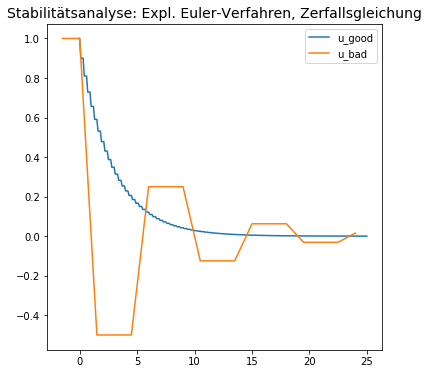

looks wrong/bad...


In [5]:
length = 25
tau = 2

delta_t = 0.1
u_good, x_good = get_u_leapfrog(tau, length, delta_t)
g_plus, g_minus = unconditionally_unstable(delta_t, tau)
print("g_plus for delta_t (%f): %f, g > 1: %r" % (delta_t, g_plus, g_plus>1))
print("g_minus for delta_t (%f): %f, g > 1: %r\n" % (delta_t, g_minus, g_minus>1))

delta_t = 1.5
u_bad, x_bad = get_u_leapfrog(tau, length, delta_t)
g_plus, g_minus = unconditionally_unstable(delta_t, tau)
print("g_plus for delta_t (%f): %f, g > 1: %r" % (delta_t, g_plus, g_plus>1))
print("g_minus for delta_t (%f): %f, g > 1: %r\n" % (delta_t, g_minus, g_minus>1))

plt.figure(figsize=(6,6))
plt.title("Stabilitätsanalyse: Expl. Euler-Verfahren, Zerfallsgleichung", fontsize=14)
plt.plot(x_good, u_good, label="u_good")
plt.plot(x_bad, u_bad, label="u_bad")
plt.legend()
plt.show()
plt.close()
print("looks wrong/bad...")

## Unbedingt Stabil: Impl. Euler-Verfahren, Zerfallsgleichung

In [6]:
def get_u_impl_euler(tau, length, delta_t):
    steps = int(25/delta_t)
    u = [1]
    x = [0]
    for i in range(steps):
        # Solve u[i+1] = u[i] - u[i+1]*delta_t/tau
        u.append(u[i]/(1+delta_t/tau))
        x.append((i+1)*delta_t)
    return u, x

def unconditionally_stable(delta_t, tau):
    return 1/(1+delta_t/tau)

g for delta_t (0.100000): 0.952381, g < 1: True
g for delta_t (3.500000): 0.363636, g < 1: True


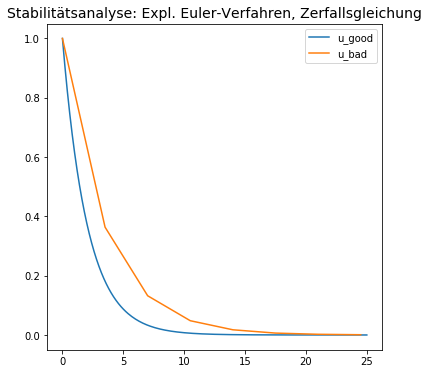

In [7]:
length = 25
tau = 2

delta_t = 0.1
u_good, x_good = get_u_impl_euler(tau, length, delta_t)
g = unconditionally_stable(delta_t, tau)
print("g for delta_t (%f): %f, g < 1: %r" % (delta_t, g, g<1))

delta_t = 3.5
u_bad, x_bad = get_u_impl_euler(tau, length, delta_t)
g = unconditionally_stable(delta_t, tau)
print("g for delta_t (%f): %f, g < 1: %r" % (delta_t, g, g<1))

plt.figure(figsize=(6,6))
plt.title("Stabilitätsanalyse: Expl. Euler-Verfahren, Zerfallsgleichung", fontsize=14)
plt.plot(x_good, u_good, label="u_good")
plt.plot(x_bad, u_bad, label="u_bad")
plt.legend()
plt.show()
plt.close()

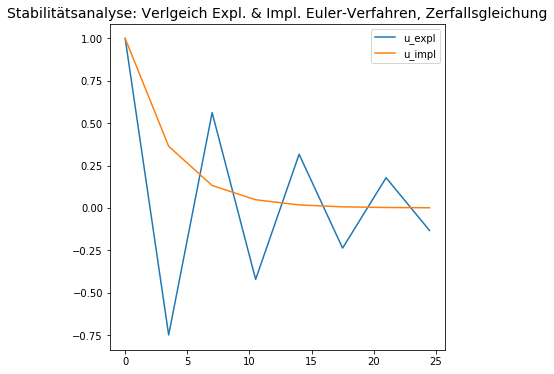

very impressive


In [10]:
u_bad_expl, x_bad_expl = get_u_expl_euler(tau, length, delta_t)
u_bad_impl, x_bad_impl = get_u_impl_euler(tau, length, delta_t)

plt.figure(figsize=(6,6))
plt.title("Stabilitätsanalyse: Verlgeich Expl. & Impl. Euler-Verfahren, Zerfallsgleichung", fontsize=14)
plt.plot(x_bad_expl, u_bad_expl, label="u_expl")
plt.plot(x_bad_impl, u_bad_impl, label="u_impl")
plt.legend()
plt.show()
plt.close()
print("very impressive")